In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from paretoset import paretoset
from scipy import stats
from scipy.special import rel_entr

from SOT_model import SOT_Model

In [2]:
SAMPLES = 100_000
PDF_TYPE = "gamma"

alpha = 0.01
Ki = 0.0002
Ms = 300000
Rp = 13265.555784106255
TMR = 0.3
eta = 0.8
J_she = 334994280934.3338
t_pulse = 7.5e-08
t_relax = 7.5e-08
d = 3e-09
tf = 1.1e-09

In [3]:
chi2, bitstream, energy_avg, countData, bitData, xxis, pdf = SOT_Model(alpha, Ki, Ms, Rp, TMR, d, tf, eta, J_she, t_pulse, t_relax, samples=SAMPLES, pdf_type=PDF_TYPE)
kl_div_score = sum(rel_entr(countData, pdf))
energy = np.mean(energy_avg)

print("Chi2  :", chi2)
print("KL_Div:", kl_div_score)
print("Energy:", energy)

Chi2  : 1478.77717370943
KL_Div: 0.007153315911185557
Energy: 5.1327010201561e-13


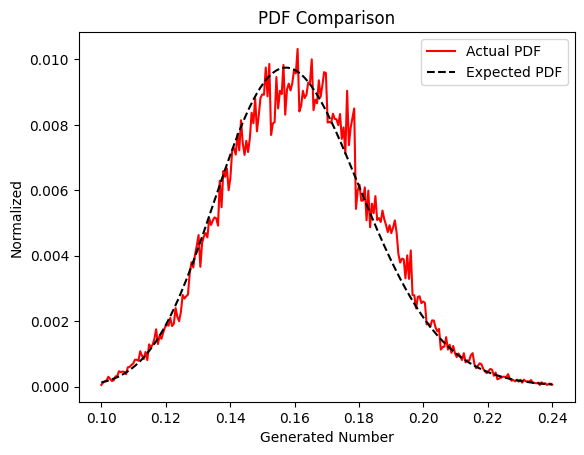

In [4]:
plt.plot(xxis, countData, color="red", label="Actual PDF")
plt.plot(xxis, pdf,'k--', label="Expected PDF")
plt.xlabel("Generated Number")
plt.ylabel("Normalized")
plt.title("PDF Comparison")
plt.legend()
plt.show()

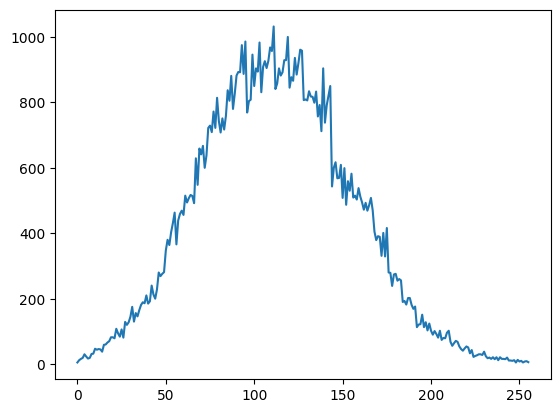

In [5]:
bitData.sort()
bitDict = {i:bitData.count(i) for i in bitData}

plt.plot(bitDict.keys(), bitDict.values())
plt.show()

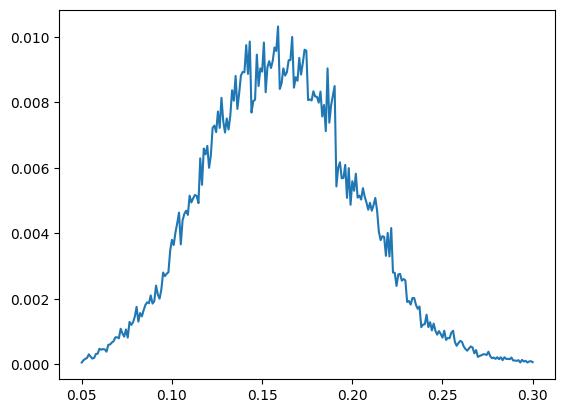

In [6]:
x_axis = np.linspace(0.05, 0.3, len(bitDict.keys()))
y_axis = [i/SAMPLES for i in list(bitDict.values())]

plt.plot(x_axis, y_axis)
plt.show()

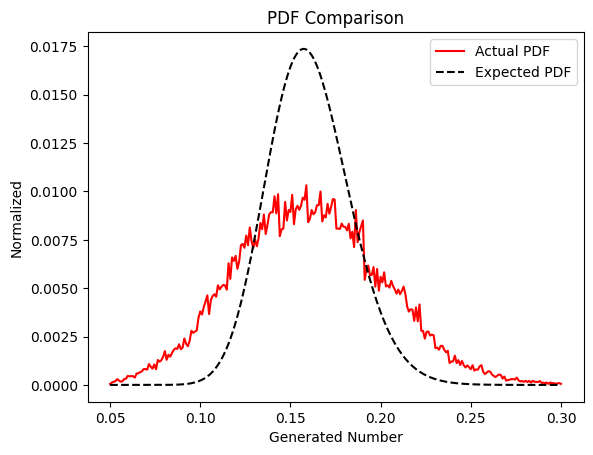

0.6246158150830822


In [7]:
xxis = np.linspace(0.05, 0.3, len(y_axis))
pdf = stats.gamma.pdf(xxis, a=50, scale=1/311.44)
pdf = pdf/np.sum(pdf)

plt.plot(xxis, y_axis, color="red", label="Actual PDF")
plt.plot(xxis, pdf,'k--', label="Expected PDF")
plt.xlabel("Generated Number")
plt.ylabel("Normalized")
plt.title("PDF Comparison")
plt.legend()
plt.show()

kl_div_score = sum(rel_entr(y_axis, pdf))
print(kl_div_score)